Part1

In [202]:
import numpy as np
import matplotlib.pyplot as plt

In [203]:
class LinearRegression:
    def __init__(self, n_feature = 1, lr=1e-4, epoch=10000, batch_size=10, tol = 1e-5):
        self.lr = lr  # 学习率
        self.epoch = epoch    # 迭代次数
        self.batch_size = batch_size        # 批量大小
        self.tol = tol          # 收敛阈值
        self.W = np.random.randn(n_feature + 1) * 0.05     # 权重
        self.losses = []

    def fit(self, X, y):
        X = np.c_[X, np.ones(X.shape[0])]  # 添加一列全为1的列作为偏置
        for i in range(self.epoch):
            # self._sgd_update(X, y)
            # self._bgd_update(X, y)
            self._sgd_update(X, y)
            if i % 100 == 0:
                loss = self._mse_loss(y, np.dot(X,self.W))
                self.losses.append(loss)
                print(f"for {i} iteration, the loss is {loss}")
        return self.W

    def _predict(self, X):
        return X @ self.W 

    def _mse_loss(self, y_true, y_pred):
        return ((y_true - y_pred) ** 2).mean()  # 计算均方误差损失

    def _gradient(self, X, y, y_pred):
        if isinstance(y, np.ndarray):
            delta_y = (y_pred-y).reshape((y.shape[0], 1))
            return np.mean(2 * delta_y.T @ X)
        else:
            delta_y = y_pred-y
            return (2 * delta_y.T * X).reshape((self.W.shape[0]))

    def _sgd_update(self, X, y):
        pred = self._predict(X)
        i = np.random.randint(0, len(X))
        grad = self._gradient( X[i,:][np.newaxis, :], y[i], pred[i])
        self.W -= self.lr * grad  # 随机梯度下降更新

    def _bgd_update(self, X, y): 
        pred = self._predict(X)
        grad = self._gradient(X, y, pred)
        self.W -= self.lr * grad  # 批量梯度下降更新
        
    def _mbgd_update(self, X, y):
        pred = self._predict(X)
        indices = np.random.choice(y.shape[0], self.batch_size, replace=False)
        # grad = np.zeros(self.W.shape[0])
        # for i in indices:
        #     grad += self._gradient(X[i], y[i], pred[i])
        grad = self._gradient(X[indices], y[indices], pred[indices])
        self.W -= self.lr * grad/self.batch_size

    def min_max_normalization(self, X):
        return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))  # 最小-最大归一化

    def mean_normalization(self, X):
        return (X - X.mean(axis=0))  # 均值归一化


Part2

In [204]:
X_train = np.arange(100).reshape(100,1)
a, b = 1, 10
y_train = a * X_train + b + np.random.normal(0, 5, size=X_train.shape)
y_train = y_train.reshape(-1)

画出线性回归拟合后的曲线

for 0 iteration, the loss is 3253.007907727075
for 100 iteration, the loss is 231.17846155920975
for 200 iteration, the loss is 47.33226660882595
for 300 iteration, the loss is 47.05511252518905
for 400 iteration, the loss is 46.64592172259982
for 500 iteration, the loss is 68.5506484922966
for 600 iteration, the loss is 81.17597497963608
for 700 iteration, the loss is 51.95232538446825
for 800 iteration, the loss is 49.204932782779395
for 900 iteration, the loss is 88.54078831329481
for 1000 iteration, the loss is 49.29235427529926
for 1100 iteration, the loss is 45.55007407975545
for 1200 iteration, the loss is 103.24459762740452
for 1300 iteration, the loss is 45.551018349151946
for 1400 iteration, the loss is 66.82774389848971
for 1500 iteration, the loss is 45.06800276981496
for 1600 iteration, the loss is 84.02383384769082
for 1700 iteration, the loss is 45.09266516368734
for 1800 iteration, the loss is 116.41910502828178
for 1900 iteration, the loss is 108.16582434714428
for 200

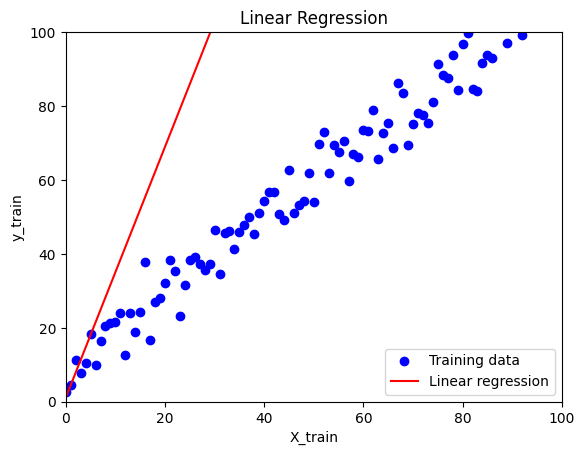

In [205]:
model = LinearRegression(n_feature=X_train.shape[1])
w = model.fit(X_train, y_train)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')

x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), num=100)
y_values = w[0] + w[1] * x_values
plt.plot(x_values, y_values, color='red', label='Linear regression')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.title('Linear Regression')
plt.show()

画出loss

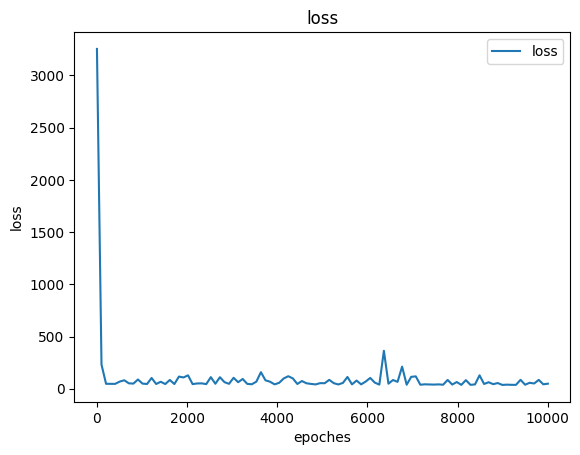

In [206]:
epoches = np.linspace(0, model.epoch, num=100)
los = model.losses
plt.plot(epoches, los, label='loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend()
plt.title('loss')
plt.show()